# Tune-up Template 

## 0. Chip Layout, Wiring, and Fabrication 

### 0.1 Chip layout

Put your chip layout here

### 0.2 Wiring

Describe your wiring here

### 0.3 Fabrication Parameters

You might know something about your qubits from fabrication, you can put those here before you start:

|                  | QB1               | QB2          | QB3               | QB4               | QB5          | QB6               |
|------------------|-------------------|--------------|-------------------|-------------------|--------------|-------------------|
| Upper Sweet Spot |  |  |  |  |  |  |
| Lower Sweet Spot |  |  |  |  |  |  |
| Resonator        | 7.0G              | 7.2G         | 7.4G              | 7.1G              | 7.3G         | 7.5G              |

## 1. Imports


# Tune-up Template 

## 0. Chip Layout, Wiring, and Fabrication 

### 0.1 Chip layout

Put your chip layout here

### 0.2 Wiring

Describe your wiring here

### 0.3 Fabrication Parameters

You might know something about your qubits from fabrication, you can put those here before you start:

|                  | QB1               | QB2          | QB3               | QB4               | QB5          | QB6               |
|------------------|-------------------|--------------|-------------------|-------------------|--------------|-------------------|
| Upper Sweet Spot |  |  |  |  |  |  |
| Lower Sweet Spot |  |  |  |  |  |  |
| Resonator        | 7.0G              | 7.2G         | 7.4G              | 7.1G              | 7.3G         | 7.5G              |

## 1. Imports


In [1]:
# convenience Import for all LabOne Q Functionality
from laboneq.simple import *

# plotting and fitting functionality
from laboneq.contrib.example_helpers.plotting.plot_helpers import (
    plot_results,
)

# descriptor imports

# for saving results and pulse sheets
import scipy

import matplotlib.pyplot as plt
import numpy as np


from experiment_library.analysis.tuneup_helper_legacy import (
    flatten,
    evaluate_T1,
    analyze_qspec,
)

from experiment_library.calibration_helpers import (
    update_qubit_parameters_and_calibration,
    load_qubit_parameters,
    save_results,
)

from experiment_library.experiments.experiment_library_legacy import (
    resonator_spectroscopy_parallel_CW_full_range,
    resonator_spectroscopy_single,
    resonator_spectroscopy_g_vs_e,
    readout_pulse,
    integration_kernel,
    qubit_spectroscopy_single,
    res_spectroscopy_pulsed_amp_sweep,
    t1_parallel,
    create_freq_sweep,
    qubit_drive_pulse,
    readout_gauss_square_pulse,
)

In [2]:
plt.rcParams.update(
    {
        "font.family": "ZI Akkurat",
        "font.weight": "light",
        "axes.labelweight": "light",
        "axes.titleweight": "normal",
        "svg.fonttype": "none",  # Make text editable in SVG
        "text.usetex": False,
    }
)

In [3]:
blue_color_zi = "#009EE0"
orange_color_zi = "#EE7F00"
dark_blue_color_zi = "#172983"

## 2. Set-up


### Emulation Mode


In [4]:
emulate = True

### Database Set-up


In [5]:
# set up connection to database
demo_setup_db = DataStore("laboneq_data/setup_database.db")

demo_results_db = DataStore("laboneq_data/results_database.db")

### Device Set-up


In [6]:
from textwrap import dedent

descriptor = dedent(
    """\
instruments:
  SHFQC:
    - address: dev12250
      uid: device_shfqc
connections:

  device_shfqc:
    - iq_signal: q0/measure_line
      ports: QACHANNELS/0/OUTPUT
    - acquire_signal: q0/acquire_line
      ports: QACHANNELS/0/INPUT

    - iq_signal: q0/drive_line
      ports: SGCHANNELS/3/OUTPUT
"""
)
demo_setup = DeviceSetup.from_descriptor(
    descriptor, server_host="localhost", server_port=8004, setup_name="MySetup"
)

### Apply Calibration from File


In [7]:
qubit_parameters = load_qubit_parameters()

qubit_parameters["local_oscillators"]["readout_lo"]["value"] = 7.0e9

transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)
print(demo_setup.get_calibration())

Calibration(
│   calibration_items={
│   │   '/logical_signal_groups/q0/drive_line': SignalCalibration(
│   │   │   oscillator=Oscillator(
│   │   │   │   uid='q0_drive_ge_osc',
│   │   │   │   frequency=811539176.0604649,
│   │   │   │   modulation_type=ModulationType.HARDWARE,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   local_oscillator=Oscillator(
│   │   │   │   uid='q0_drive_local_osc',
│   │   │   │   frequency=5000000000.0,
│   │   │   │   modulation_type=ModulationType.AUTO,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   mixer_calibration=None,
│   │   │   precompensation=None,
│   │   │   port_delay=None,
│   │   │   port_mode=None,
│   │   │   delay_signal=None,
│   │   │   voltage_offset=None,
│   │   │   range=10,
│   │   │   threshold=None,
│   │   │   amplitude=None,
│   │   │   amplifier_pump=None
│   │   ),
│   │   '/logical_signal_groups/q0/measure_line': SignalCalibration(
│   │   │   oscillator=Oscillator(
│   │   │   │   uid='q0_measure_osc',
│   │   │   │   frequency=258000000.0,
│   │   │   │   modulation_type=ModulationType.SOFTWARE,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   local_oscillator=Oscillator(
│   │   │   │   uid='q0_readout_local_osc',
│   │   │   │   frequency=7000000000.0,
│   │   │   │   modulation_type=ModulationType.AUTO,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   mixer_calibration=None,
│   │   │   precompensation=None,
│   │   │   port_delay=None,
│   │   │   port_mode=None,
│   │   │   delay_signal=None,
│   │   │   voltage_offset=None,
│   │   │   range=-25,
│   │   │   threshold=None,
│   │   │   amplitude=None,
│   │   │   amplifier_pump=None
│   │   ),
│   │   '/logical_signal_groups/q0/acquire_line': SignalCalibration(
│   │   │   oscillator=Oscillator(
│   │   │   │   uid='q0_acquire_osc',
│   │   │   │   frequency=258000000.0,
│   │   │   │   modulation_type=ModulationType.SOFTWARE,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   local_oscillator=Oscillator(
│   │   │   │   uid='q0_readout_local_osc',
│   │   │   │   frequency=7000000000.0,
│   │   │   │   modulation_type=ModulationType.AUTO,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   mixer_calibration=None,
│   │   │   precompensation=None,
│   │   │   port_delay=2.4e-07,
│   │   │   port_mode=None,
│   │   │   delay_signal=None,
│   │   │   voltage_offset=None,
│   │   │   range=-5,
│   │   │   threshold=None,
│   │   │   amplitude=None,
│   │   │   amplifier_pump=None
│   │   ),
│   │   '/physical_channel_groups/device_shfqc/qachannels_0_output': SignalCalibration(
│   │   │   oscillator=None,
│   │   │   local_oscillator=Oscillator(
│   │   │   │   uid='q0_readout_local_osc',
│   │   │   │   frequency=7000000000.0,
│   │   │   │   modulation_type=ModulationType.AUTO,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   mixer_calibration=None,
│   │   │   precompensation=None,
│   │   │   port_delay=None,
│   │   │   port_mode=None,
│   │   │   delay_signal=None,
│   │   │   voltage_offset=None,
│   │   │   range=-25,
│   │   │   threshold=None,
│   │   │   amplitude=None,
│   │   │   amplifier_pump=None
│   │   ),
│   │   '/physical_channel_groups/device_shfqc/qachannels_0_input': SignalCalibration(
│   │   │   oscillator=None,
│   │   │   local_oscillator=Oscillator(
│   │   │   │   uid='q0_readout_local_osc',
│   │   │   │   frequency=7000000000.0,
│   │   │   │   modulation_type=ModulationType.AUTO,
│   │   │   │   carrier_type=CarrierType.RF
│   │   │   ),
│   │   │   mixer_calibration=None,
│   │   │   precompensation=None,
│   │   │   port_delay=2.4e-07,
│   │   │   port_mode=None,
│   │   │   delay_signal=None,
│   │   │   voltage_offset=None,
│   │   │   range=-5,
│   │   │   threshold=None,
│   │   │   amplitude=None,
│   │   │   amplifier_pump=None
│   │   ),
│   │   '/physical_channel_groups/device_shfqc/sgchannels_3_output': SignalCalibrat

### Create and Connect to a QCCS Session 

Establishes the connection to the instruments and readies them for experiments


In [8]:
# create and connect to a session
session = Session(device_setup=demo_setup)
session.connect(do_emulation=emulate, reset_devices=True)

[2023.10.19 13:25:21.519] INFO    Logging initialized from [Default inline config in laboneq.controller.laboneq_logging] logdir is /Users/chihuann/code/related_laboneq/laboneq-library/examples/laboneq_output/log
[2023.10.19 13:25:21.520] INFO    VERSION: laboneq 2.16.0
[2023.10.19 13:25:21.521] INFO    Connecting to data server at localhost:8004
[2023.10.19 13:25:21.521] INFO    Connected to Zurich Instruments LabOne Data Server version 23.06 at localhost:8004
[2023.10.19 13:25:21.523] INFO    Configuring the device setup
[2023.10.19 13:25:21.523] INFO    The device setup is configured


## CW Spectroscopy


In [9]:
cw_spectroscopy_exp = resonator_spectroscopy_parallel_CW_full_range(
    transmon_list,
    create_freq_sweep("outer", 6e9, 8e9, 3),
    create_freq_sweep("inner", -500e6, 500e6, 1001),
)
session.connect(do_emulation=emulate, reset_devices=True)
compiled_cw_spectroscopy_exp = session.compile(cw_spectroscopy_exp)
cw_spectroscopy_results = session.run(compiled_cw_spectroscopy_exp)

[2023.10.19 13:25:21.528] INFO    VERSION: laboneq 2.16.0
[2023.10.19 13:25:21.529] INFO    Connecting to data server at localhost:8004
[2023.10.19 13:25:21.529] INFO    Connected to Zurich Instruments LabOne Data Server version 23.06 at localhost:8004
[2023.10.19 13:25:21.530] INFO    Configuring the device setup
[2023.10.19 13:25:21.531] INFO    The device setup is configured
[2023.10.19 13:25:21.533] INFO    Starting LabOne Q Compiler run...
[2023.10.19 13:25:21.588] INFO    Schedule completed
[2023.10.19 13:25:21.727] INFO     ────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:21.728] INFO      Device         AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2023.10.19 13:25:21.728] INFO     ────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:21.729] INFO      device_shfqc     0         25            0           0         0  
[2023.10.19 13:25:21.729] INFO     ───────────────────────────────────────────────────

Text(0.5, 1.0, 'CW resonator spectroscopy, large range')

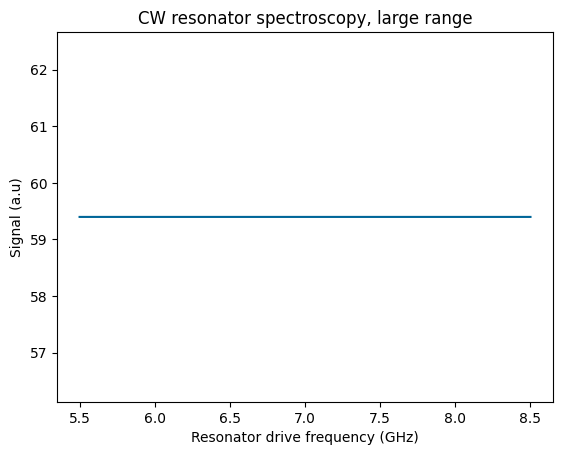

In [10]:
# access and plot results of one 8GHz sweep
gnd_signal = abs(cw_spectroscopy_results.get_data("resonator_spectroscopy_q0"))

outer = cw_spectroscopy_results.get_axis("resonator_spectroscopy_q0")[0]
inner = cw_spectroscopy_results.get_axis("resonator_spectroscopy_q0")[1]
full_sweep = np.array(flatten([out + inner for out in outer]))

plt.plot(full_sweep / 1e9, np.array(flatten([data for data in gnd_signal])))
plt.xlabel("Resonator drive frequency (GHz)")
plt.ylabel("Signal (a.u)")
plt.title("CW resonator spectroscopy, large range")

In [11]:
save_results(demo_results_db, cw_spectroscopy_results, "cw_spec_results", "full_sweep")

# Baseband sweep CW spectroscopy

In [12]:
single_cw = resonator_spectroscopy_single(
    transmon_list[0],
    create_freq_sweep(f"{transmon_list[0].uid}_sweep", 210e6, 290e6, 401),
    measure_range=-25,
    acquire_range=-5,
)
session.connect(do_emulation=emulate, reset_devices=True)
compiled_single_cw_spect_exp = session.compile(single_cw)
cw_spectroscopy_results = session.run(compiled_single_cw_spect_exp)
# plot_results(cw_spectroscopy_results)

[2023.10.19 13:25:21.949] INFO    VERSION: laboneq 2.16.0
[2023.10.19 13:25:21.950] INFO    Connecting to data server at localhost:8004
[2023.10.19 13:25:21.951] INFO    Connected to Zurich Instruments LabOne Data Server version 23.06 at localhost:8004
[2023.10.19 13:25:21.954] INFO    Configuring the device setup
[2023.10.19 13:25:21.955] INFO    The device setup is configured
[2023.10.19 13:25:21.958] INFO    Starting LabOne Q Compiler run...
[2023.10.19 13:25:21.993] INFO    Schedule completed
[2023.10.19 13:25:22.048] INFO     ────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:22.048] INFO      Device         AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2023.10.19 13:25:22.048] INFO     ────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:22.049] INFO      device_shfqc     0         25            0           0         0  
[2023.10.19 13:25:22.049] INFO     ───────────────────────────────────────────────────

### Make nice resonator spectroscopy plot

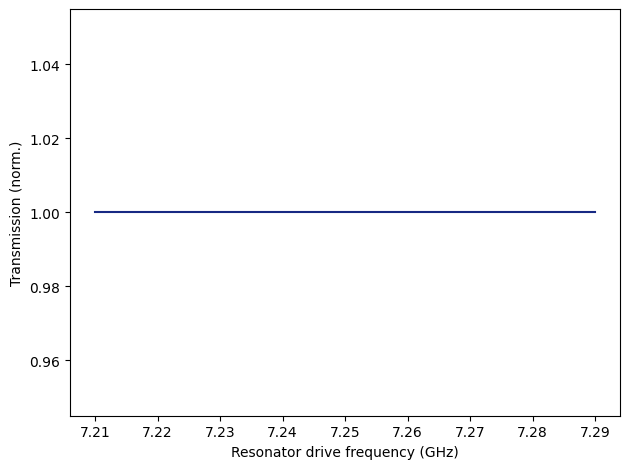

In [13]:
lo_frequency = cw_spectroscopy_results.experiment.signals[
    "measure_q0"
].calibration.local_oscillator.frequency

gnd_signal = abs(cw_spectroscopy_results.get_data("resonator_spectroscopy_q0"))
full_sweep = (
    cw_spectroscopy_results.get_axis("resonator_spectroscopy_q0")[0] + lo_frequency
)

gnd_signal = gnd_signal / max(gnd_signal)

plt.plot(full_sweep / 1e9, gnd_signal, color=dark_blue_color_zi)
plt.xlabel("Resonator drive frequency (GHz)")
plt.ylabel("Transmission (norm.)")
plt.tight_layout()

In [14]:
# analyze_qspec(res=cw_spectroscopy_results, handle="resonator_spectroscopy_q0")

In [15]:
first_readout_res = lo_frequency + 0.258e9
print(first_readout_res)

7258000000.0


In [16]:
qubit_parameters["qubits"]["q0"]["readout_resonator_frequency"][
    "value"
] = first_readout_res

transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

# Spectroscopy vs Power - "Punchout" NOT TESTED


[2023.10.19 13:25:22.157] INFO    VERSION: laboneq 2.16.0
[2023.10.19 13:25:22.158] INFO    Connecting to data server at localhost:8004
[2023.10.19 13:25:22.159] INFO    Connected to Zurich Instruments LabOne Data Server version 23.06 at localhost:8004
[2023.10.19 13:25:22.160] INFO    Configuring the device setup
[2023.10.19 13:25:22.160] INFO    The device setup is configured
[2023.10.19 13:25:22.162] INFO    Starting LabOne Q Compiler run...
[2023.10.19 13:25:22.264] INFO    Schedule completed
[2023.10.19 13:25:22.528] INFO     ────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:22.529] INFO      Device         AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2023.10.19 13:25:22.529] INFO     ────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:22.529] INFO      device_shfqc     0         23            0           1      3200  
[2023.10.19 13:25:22.530] INFO     ───────────────────────────────────────────────────

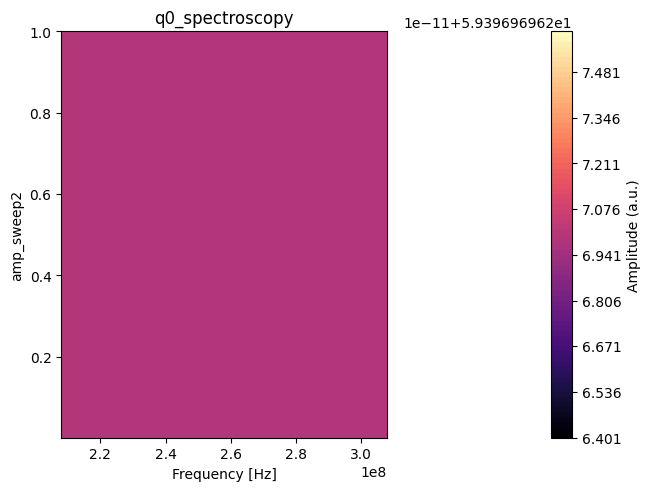

In [17]:
if True:
    freq_upper = (
        transmon_list[0].parameters.readout_resonator_frequency
        - transmon_list[0].parameters.readout_lo_frequency
        + 50e6
    )
    freq_lower = (
        transmon_list[0].parameters.readout_resonator_frequency
        - transmon_list[0].parameters.readout_lo_frequency
        - 50e6
    )

    amp_sweep = SweepParameter(
        uid="amp_sweep2",
        values=np.logspace(start=np.log10(0.001), stop=np.log10(1), num=3),
    )

    punchout = res_spectroscopy_pulsed_amp_sweep(
        qubit=transmon_list[0],
        integration_kernel=integration_kernel,
        readout_pulse=readout_gauss_square_pulse,
        frequency_sweep=create_freq_sweep(
            f"{transmon_list[0].uid}_sweep", freq_lower, freq_upper, 1001
        ),
        amplitude_sweep=amp_sweep,
        num_averages=2**8,
        measure_range=-25,
        acquire_range=-5,
    )

    session.connect(do_emulation=emulate, reset_devices=True)
    comp_punchout = session.compile(punchout)
    punchout_result = session.run(comp_punchout)

    plot_results(punchout_result)

In [18]:
if False:
    save_results(
        demo_results_db,
        punchout_result,
        "punchout",
        "neg_25_meas_neg_5_acq_range",
    )

In [19]:
if False:
    qubit_parameters["multiplex_readout"]["readout_amplitude"]["value"] = 0.55

    transmon_list = update_qubit_parameters_and_calibration(
        qubit_parameters, demo_setup, demo_setup_db
    )

## Continue with your tune-up experiments:

* Qubit Spec
* Rabi
* Ramsey
* T1
* Hahn Echo

What's after that? There are many ways to go once you have done the basics:

* Drag pulse tune-up
* Single shot readout
* Active reset
* f-level tune-up
* Two qubit gates
* Tomography
* RB

# Qubit Spectroscopy

In [20]:
def gen_const_pulse(qubit, length=15e-5, amplitude=1.0):
    return pulse_library.const(
        uid=f"{qubit}", length=length, amplitude=amplitude, can_compress=True
    )

In [21]:
qubit_parameters["qubits"]["q0"]["drive_range_ge"]["value"] = -30
transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

In [22]:
qubit_spec_exp = qubit_spectroscopy_single(
    qubit=transmon_list[0],
    integration_kernel=integration_kernel,
    readout_pulse=readout_pulse,
    qubit_spectroscopy_pulse=gen_const_pulse,
    qspec_range=6e6,
    qspec_num=251,
    num_averages=2**10,
)

In [23]:
session.connect(do_emulation=emulate, reset_devices=True)
qspec_res = session.run(qubit_spec_exp)

[2023.10.19 13:25:22.720] INFO    VERSION: laboneq 2.16.0
[2023.10.19 13:25:22.721] INFO    Connecting to data server at localhost:8004
[2023.10.19 13:25:22.721] INFO    Connected to Zurich Instruments LabOne Data Server version 23.06 at localhost:8004
[2023.10.19 13:25:22.723] INFO    Configuring the device setup
[2023.10.19 13:25:22.723] INFO    The device setup is configured
[2023.10.19 13:25:22.725] INFO    Starting LabOne Q Compiler run...
[2023.10.19 13:25:22.744] INFO    Schedule completed
[2023.10.19 13:25:23.613] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:23.614] INFO      Device            AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2023.10.19 13:25:23.614] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:23.614] INFO      device_shfqc        0         14            0           1      3200  
[2023.10.19 13:25:23.615] INFO      device_shfqc_sg     3         32      

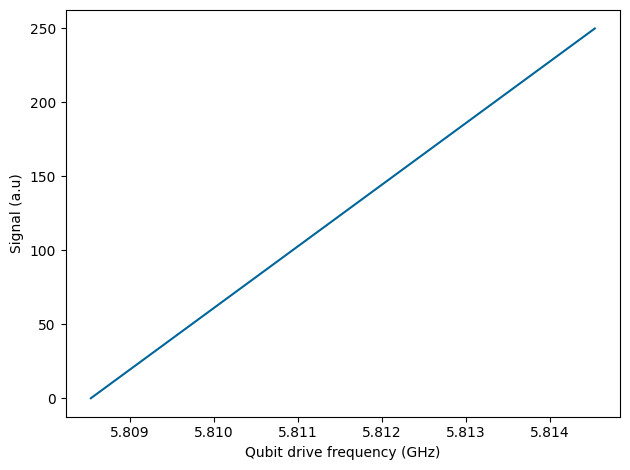

In [24]:
lo_frequency = qubit_parameters["qubits"]["q0"]["drive_lo_frequency"]["value"]

gnd_signal = abs(
    qspec_res.get_data("q0_spectroscopy") - qspec_res.get_data("q0_spectroscopy")[0]
)
gnd_signal = gnd_signal
# gnd_signal = abs(qspec_res.get_data("q0_spectroscopy"))
full_sweep = qspec_res.get_axis("q0_spectroscopy")[0] + lo_frequency

plt.plot(full_sweep / 1e9, gnd_signal)
plt.xlabel("Qubit drive frequency (GHz)")
plt.ylabel("Signal (a.u)")
plt.tight_layout()

/Users/chihuann/code/related_laboneq/laboneq-library/experiment_library/analysis/tuneup_helper_legacy.py:220: RankWarning: Polyfit may be poorly conditioned
  slope = np.polyfit(np.real(complex_values), np.imag(complex_values), 1)[0]


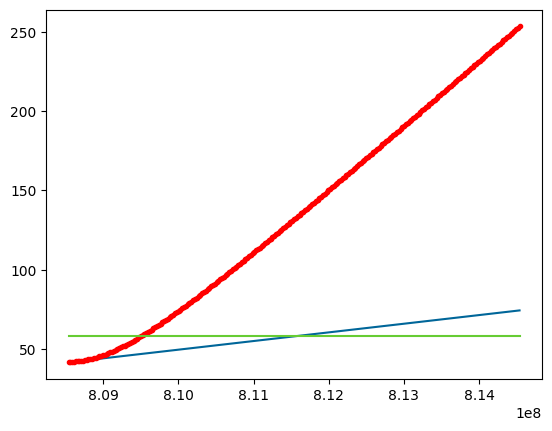

798294973.6729732


In [25]:
qubit_resonance = analyze_qspec(
    qspec_res, "q0_spectroscopy", f0=7.49e8, a=0.03, gamma=1e6, flip=True, rotate=True
)
print(qubit_resonance)

### Update qubit resonance

In [26]:
qubit_parameters["qubits"]["q0"]["resonance_frequency_ge"]["value"] = (
    qubit_parameters["qubits"]["q0"]["drive_lo_frequency"]["value"] + qubit_resonance
)
print(qubit_parameters["qubits"]["q0"]["resonance_frequency_ge"]["value"])
transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

5798294973.672974


# Amplitude Rabi

In [27]:
qubit_parameters["qubits"]["q0"]["drive_range_ge"]["value"] = 10
transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

In [28]:
def amplitude_rabi_single(
    qubit,
    drive_pulse,
    integration_kernel,
    readout_pulse,
    amplitude_sweep,
    num_averages=2**10,
    cal_trace=False,
    pi_amplitude=0.5,
):
    exp_rabi = Experiment(
        uid="Qubit Spectroscopy",
        signals=flatten(
            [
                [
                    ExperimentSignal(
                        f"drive_{qubit.uid}", map_to=qubit.signals["drive"]
                    ),
                    ExperimentSignal(
                        f"measure_{qubit.uid}", map_to=qubit.signals["measure"]
                    ),
                    ExperimentSignal(
                        f"acquire_{qubit.uid}", map_to=qubit.signals["acquire"]
                    ),
                ]
            ]
        ),
    )

    ## define Rabi experiment pulse sequence
    # outer loop - real-time, cyclic averaging
    with exp_rabi.acquire_loop_rt(
        uid="rabi_shots",
        count=num_averages,
        averaging_mode=AveragingMode.CYCLIC,
        acquisition_type=AcquisitionType.INTEGRATION,
    ):
        # inner loop - real time sweep of Rabi amplitudes
        with exp_rabi.sweep(uid="rabi_sweep", parameter=amplitude_sweep):
            # qubit drive
            with exp_rabi.section(
                uid=f"{qubit.uid}_excitation", alignment=SectionAlignment.RIGHT
            ):
                exp_rabi.play(
                    signal=f"drive_{qubit.uid}",
                    pulse=drive_pulse(qubit, amplitude=1),
                    amplitude=amplitude_sweep,
                )
            # measurement
            with exp_rabi.section(
                uid=f"readout_{qubit.uid}", play_after=f"{qubit.uid}_excitation"
            ):
                exp_rabi.measure(
                    measure_signal=f"measure_{qubit.uid}",
                    measure_pulse=readout_pulse(qubit),
                    handle=f"{qubit.uid}_rabi",
                    acquire_signal=f"acquire_{qubit.uid}",
                    integration_kernel=integration_kernel(qubit),
                    reset_delay=qubit.parameters.user_defined["reset_delay_length"],
                )
        if cal_trace:
            with exp_rabi.section(uid="cal_trace_gnd_meas"):
                exp_rabi.measure(
                    measure_signal=f"measure_{qubit.uid}",
                    measure_pulse=readout_pulse(qubit),
                    handle=f"{qubit.uid}_rabi_cal_trace",
                    acquire_signal=f"acquire_{qubit.uid}",
                    integration_kernel=integration_kernel(qubit),
                    reset_delay=1e-6,  # qubit.parameters.user_defined["reset_delay_length"],
                )
            with exp_rabi.section(uid="cal_trace_exc", play_after="cal_trace_gnd_meas"):
                exp_rabi.play(
                    signal=f"drive_{qubit.uid}",
                    pulse=drive_pulse(qubit, amplitude=1),
                    amplitude=pi_amplitude,
                )

            with exp_rabi.section(uid="cal_trace_exc_meas", play_after="cal_trace_exc"):
                exp_rabi.measure(
                    measure_signal=f"measure_{qubit.uid}",
                    measure_pulse=readout_pulse(qubit),
                    handle=f"{qubit.uid}_rabi_cal_trace",
                    acquire_signal=f"acquire_{qubit.uid}",
                    integration_kernel=integration_kernel(qubit),
                    reset_delay=qubit.parameters.user_defined["reset_delay_length"],
                )

    return exp_rabi

In [29]:
amplitude_sweep = LinearSweepParameter(
    uid="amplitude_sweep", start=0.0, stop=0.9, count=51
)


amp_rabi = amplitude_rabi_single(
    qubit=transmon_list[0],
    drive_pulse=qubit_drive_pulse,
    integration_kernel=integration_kernel,
    readout_pulse=readout_pulse,
    amplitude_sweep=amplitude_sweep,
    num_averages=2**10,
    pi_amplitude=transmon_list[0].parameters.user_defined["amplitude_pi"],
    cal_trace=True,
)

compiled_rabi = session.compile(amp_rabi)
session.connect(do_emulation=emulate, reset_devices=True)
rabi_res = session.run(compiled_rabi)

[2023.10.19 13:25:23.797] INFO    Starting LabOne Q Compiler run...
[2023.10.19 13:25:23.803] INFO    Schedule completed
[2023.10.19 13:25:23.830] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:23.832] INFO      Device            AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2023.10.19 13:25:23.833] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:23.835] INFO      device_shfqc        0         20            0           1      3200  
[2023.10.19 13:25:23.841] INFO      device_shfqc_sg     3        168           52           2       832  
[2023.10.19 13:25:23.846] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:23.850] INFO      TOTAL                        188           52                  4032  
[2023.10.19 13:25:23.851] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:23.852] INFO 

### Make nice plot for Rabi oscillations

In [30]:
def rabi_curve(x, offset, phase_shift, amplitude, period):
    return amplitude * np.sin(np.pi / period * x - phase_shift) + offset

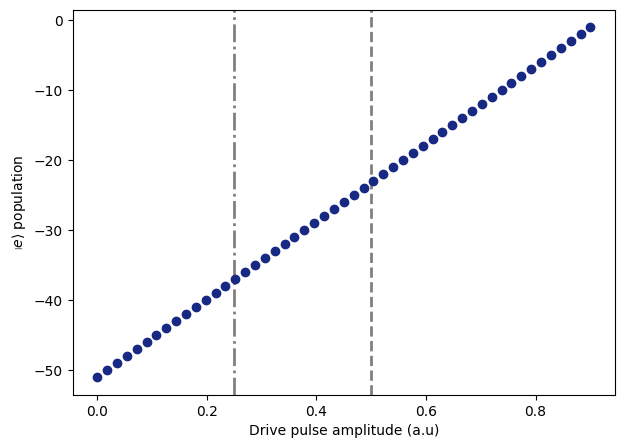

In [31]:
handles = list(rabi_res.acquired_results.keys())
res1 = np.asarray(rabi_res.get_data(handles[0]))
res_cal_trace = np.asarray(rabi_res.get_data(handles[1]))

axis1 = rabi_res.get_axis(handles[0])[0]
delta_x = axis1[-1] - axis1[-2]
axis2 = np.linspace(axis1[-1] + delta_x, axis1[-1] + 2 * delta_x, 2)

delta_vec = res_cal_trace[1] - res_cal_trace[0]
angle = np.angle(delta_vec)
rd = []
for r in [res1, res_cal_trace]:
    r = r - res_cal_trace[0]
    r = r * np.exp(-1j * angle)
    r = r / np.abs(delta_vec)
    rd.append(r)

offset_guess = np.mean(np.real(rd[0]))
phase_shift_guess = np.pi / 2
amplitude_guess = (max(np.real(rd[0])) - min(np.real(rd[0]))) / 2
period_guess = abs(axis1[np.argmax(np.real(rd[0]))] - axis1[np.argmin(np.real(rd[0]))])
p0 = [offset_guess, phase_shift_guess, amplitude_guess, period_guess]

if not emulate:
    popt = scipy.optimize.curve_fit(rabi_curve, axis1, np.real(rd[0]), p0=p0)[0]

    pi_amp = scipy.optimize.fmin(
        lambda x: -rabi_curve(x, *popt), axis1[np.argmax(np.real(rd[0]))], disp=False
    )[0]
    pi2_amp = scipy.optimize.fmin(
        lambda x: abs(rabi_curve(x, *popt) - popt[0]), pi_amp / 2, disp=False
    )[0]
else:
    pi_amp = 0.5
    pi2_amp = 0.25

plt.figure(figsize=(7, 5))
plt.xlabel("Drive pulse amplitude (a.u)")
plt.ylabel(r"$\left| e\right\rangle$ population")
plt.plot(axis1, np.real(rd[0]), "o", color=dark_blue_color_zi)
# plt.plot(axis1, rabi_curve(axis1, *popt), color=dark_blue_color_zi)
plt.axvline(x=pi_amp, color="gray", linestyle="--", linewidth=2, zorder=-1)
plt.axvline(x=pi2_amp, color="gray", linestyle="-.", linewidth=2, zorder=-1)

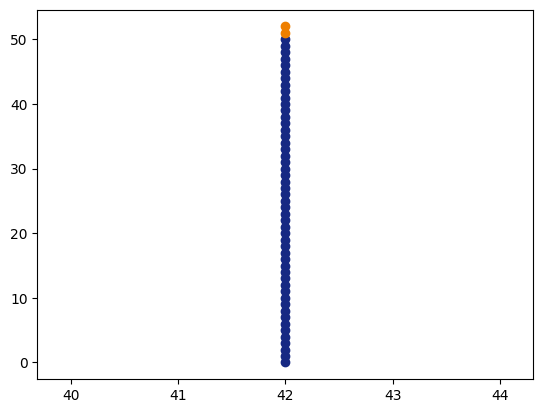

In [32]:
plt.plot(np.real(res1), np.imag(res1), "o", color=dark_blue_color_zi)
plt.plot(
    np.real(res_cal_trace[0]), np.imag(res_cal_trace[0]), "o", color=orange_color_zi
)
plt.plot(
    np.real(res_cal_trace[1]), np.imag(res_cal_trace[1]), "o", color=orange_color_zi
)

In [33]:
qubit_parameters["qubits"]["q0"]["amplitude_pi"]["value"] = float(pi_amp)
qubit_parameters["qubits"]["q0"]["amplitude_pi2"]["value"] = float(pi2_amp)


transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

## T1 measurement

In [34]:
delay_sweep = LinearSweepParameter(
    uid="delay_sweep", start=1e-10, stop=100e-6, count=51
)

t1_meas = t1_parallel(
    qubits=[transmon_list[0]],
    drive_pulse=qubit_drive_pulse,
    integration_kernel=integration_kernel,
    readout_pulse=readout_pulse,
    delay_sweep=delay_sweep,
    num_averages=2**10,
)

compiled_t1 = session.compile(t1_meas)
session.connect(do_emulation=emulate, reset_devices=True)
t1_res = session.run(compiled_t1)

[2023.10.19 13:25:24.122] INFO    Starting LabOne Q Compiler run...
[2023.10.19 13:25:24.127] INFO    Schedule completed
[2023.10.19 13:25:24.151] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:24.152] INFO      Device            AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2023.10.19 13:25:24.152] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:24.152] INFO      device_shfqc        0         12            0           1      3200  
[2023.10.19 13:25:24.153] INFO      device_shfqc_sg     3        300            1           1       416  
[2023.10.19 13:25:24.153] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:24.154] INFO      TOTAL                        312            1                  3616  
[2023.10.19 13:25:24.154] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:24.154] INFO 

T1 found to be 650255.798 us.


0.6502557980378848

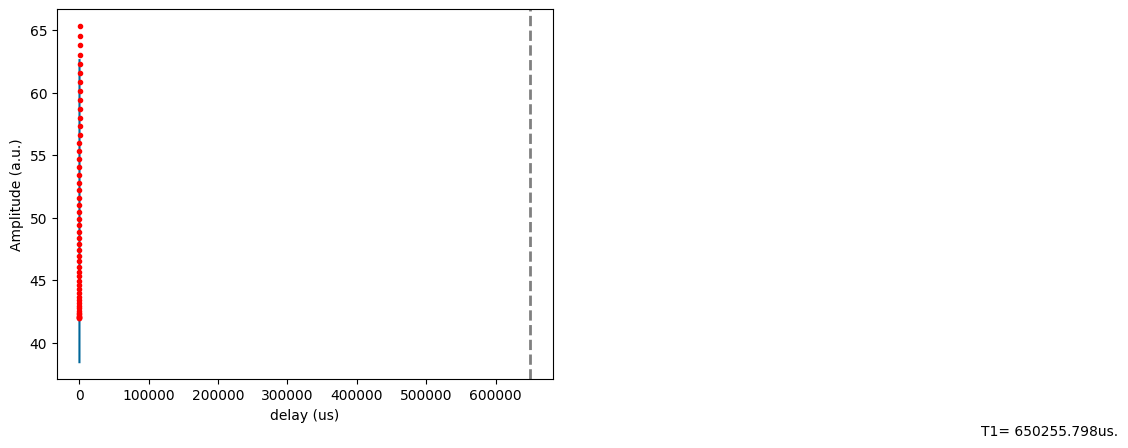

In [35]:
evaluate_T1(t1_res, "q0_t1")

## Ramsey

In [36]:
def ramsey_parallel(
    qubits,
    drive_pulse: callable,
    pi_drive_pulse: callable,
    integration_kernel: callable,
    readout_pulse: callable,
    delay_sweep,
    num_averages=2**10,
    detuning=0,
    cal_trace=False,
):
    exp_ramsey = Experiment(
        uid="Ramsey Exp",
        signals=flatten(
            [
                [
                    ExperimentSignal(
                        f"drive_{qubit.uid}", map_to=qubit.signals["drive"]
                    ),
                    ExperimentSignal(
                        f"measure_{qubit.uid}", map_to=qubit.signals["measure"]
                    ),
                    ExperimentSignal(
                        f"acquire_{qubit.uid}", map_to=qubit.signals["acquire"]
                    ),
                ]
                for qubit in qubits
            ]
        ),
    )

    #   readout_weight = readout_pulse
    freq = (
        qubits[0].parameters.resonance_frequency_ge
        + detuning
        - qubits[0].parameters.drive_lo_frequency
    )
    #  else:
    #     freq = detuning

    calibration = Calibration()
    calibration["drive_q0"] = SignalCalibration(
        oscillator=Oscillator(frequency=freq, modulation_type=ModulationType.HARDWARE)
    )

    exp_ramsey.set_calibration(calibration)

    ## define Ramsey experiment pulse sequence
    # outer loop - real-time, cyclic averaging
    with exp_ramsey.acquire_loop_rt(
        uid="ramsey_shots",
        count=num_averages,
        averaging_mode=AveragingMode.CYCLIC,
        acquisition_type=AcquisitionType.INTEGRATION,
        # repetition_mode=RepetitionMode.AUTO,
    ):
        for qubit in qubits:
            # inner loop - real time sweep of Ramsey time delays
            with exp_ramsey.sweep(
                uid="ramsey_sweep",
                parameter=delay_sweep,
                alignment=SectionAlignment.RIGHT,
            ):
                # play qubit excitation pulse - pulse amplitude is swept
                ramsey_pulse = drive_pulse(qubit)
                with exp_ramsey.section(
                    uid=f"{qubit.uid}_excitation", alignment=SectionAlignment.RIGHT
                ):
                    exp_ramsey.play(signal=f"drive_{qubit.uid}", pulse=ramsey_pulse)
                    exp_ramsey.delay(signal=f"drive_{qubit.uid}", time=delay_sweep)
                    exp_ramsey.play(signal=f"drive_{qubit.uid}", pulse=ramsey_pulse)
                # readout pulse and data acquisition
                # measurement
                with exp_ramsey.section(
                    uid=f"readout_{qubit.uid}", play_after=f"{qubit.uid}_excitation"
                ):
                    exp_ramsey.measure(
                        measure_signal=f"measure_{qubit.uid}",
                        measure_pulse=readout_pulse(qubit),
                        handle=f"{qubit.uid}_ramsey",
                        acquire_signal=f"acquire_{qubit.uid}",
                        integration_kernel=integration_kernel(qubit),
                        reset_delay=qubit.parameters.user_defined["reset_delay_length"],
                    )

            if cal_trace:
                with exp_ramsey.section(uid="cal_trace_gnd"):
                    exp_ramsey.measure(
                        measure_signal=f"measure_{qubit.uid}",
                        measure_pulse=readout_pulse(qubit),
                        handle=f"{qubit.uid}_ramsey_cal_trace",
                        acquire_signal=f"acquire_{qubit.uid}",
                        integration_kernel=integration_kernel(qubit),
                        reset_delay=1e-6,  # qubit.parameters.user_defined["reset_delay_length"],
                    )
                pi_drive_pulse(qubit)  # , amplitude = 1)
                with exp_ramsey.section(
                    uid="cal_trace_exc", play_after="cal_trace_gnd"
                ):
                    # exp_ramsey.play(
                    #     signal=f"drive_{qubit.uid}",
                    #     pulse=cal_e_pulse,
                    #   #  amplitude = transmon_list[0].parameters.user_defined["amplitude_pi"],
                    # )
                    exp_ramsey.play(signal=f"drive_{qubit.uid}", pulse=ramsey_pulse)
                    exp_ramsey.play(signal=f"drive_{qubit.uid}", pulse=ramsey_pulse)

                with exp_ramsey.section(
                    uid="cal_trace_exc_meas", play_after="cal_trace_exc"
                ):
                    exp_ramsey.measure(
                        measure_signal=f"measure_{qubit.uid}",
                        measure_pulse=readout_pulse(qubit),
                        handle=f"{qubit.uid}_ramsey_cal_trace",
                        acquire_signal=f"acquire_{qubit.uid}",
                        integration_kernel=integration_kernel(qubit),
                        reset_delay=qubit.parameters.user_defined["reset_delay_length"],
                    )

    return exp_ramsey

In [37]:
qubit_parameters["qubits"]["q0"]["reset_delay_length"]["value"] = 100e-6
transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

In [38]:
def qubit_gaussian_pulse(qubit):
    return pulse_library.gaussian(
        length=qubit.parameters.user_defined["pulse_length"],
        amplitude=qubit.parameters.user_defined["amplitude_pi"],
    )


def qubit_gaussian_halfpi_pulse(qubit):
    return pulse_library.gaussian(
        length=qubit.parameters.user_defined["pulse_length"],
        amplitude=qubit.parameters.user_defined["amplitude_pi2"],
    )

### Set detuning freq

In [39]:
detuning_freq = 0.05e6

In [40]:
delay_sweep = LinearSweepParameter(uid="delay_sweep", start=0, stop=40e-6, count=151)
ramsey_exp = ramsey_parallel(
    transmon_list,
    qubit_gaussian_halfpi_pulse,
    qubit_gaussian_pulse,
    integration_kernel,
    readout_pulse,
    delay_sweep,
    num_averages=2**10,
    detuning=detuning_freq,
    cal_trace=True,
)
session.connect(do_emulation=emulate, reset_devices=True)
compiled_exp = session.compile(ramsey_exp)
res_ramsey = session.run(compiled_exp)
# show_pulse_sheet(ramsey_exp.uid,compiled_exp)

[2023.10.19 13:25:24.283] INFO    VERSION: laboneq 2.16.0
[2023.10.19 13:25:24.283] INFO    Connecting to data server at localhost:8004
[2023.10.19 13:25:24.284] INFO    Connected to Zurich Instruments LabOne Data Server version 23.06 at localhost:8004
[2023.10.19 13:25:24.285] INFO    Configuring the device setup
[2023.10.19 13:25:24.286] INFO    The device setup is configured
[2023.10.19 13:25:24.288] INFO    Starting LabOne Q Compiler run...
[2023.10.19 13:25:24.301] INFO    Schedule completed
[2023.10.19 13:25:24.384] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:24.385] INFO      Device            AWG   SeqC LOC   CT entries   Waveforms   Samples  
[2023.10.19 13:25:24.385] INFO     ───────────────────────────────────────────────────────────────────── 
[2023.10.19 13:25:24.386] INFO      device_shfqc        0        614            0           1      3200  
[2023.10.19 13:25:24.387] INFO      device_shfqc_sg     3        777      

In [41]:
def ramsey_curve(x, offset, phase_shift, amplitude, period, t2):
    return (
        amplitude * np.exp(-x / t2) * np.sin(2 * np.pi * x / period + phase_shift)
        + offset
    )

In [42]:
handles = list(res_ramsey.acquired_results.keys())
res1 = np.asarray(res_ramsey.get_data(handles[0]))
res_cal_trace = np.asarray(res_ramsey.get_data(handles[1]))
axis1 = res_ramsey.get_axis(handles[0])[0]

delta_vec = res_cal_trace[1] - res_cal_trace[0]
angle = np.angle(delta_vec)
rd = []
for r in [res1, res_cal_trace]:
    r = r - res_cal_trace[0]
    r = r * np.exp(-1j * angle)
    r = r / np.abs(delta_vec)
    rd.append(r)

offset_guess = np.mean(np.real(rd[0]))
phase_shift_guess = np.pi / 2 if np.real(rd[0])[0] > np.real(rd[0])[-1] else -np.pi / 2
amplitude_guess = (max(np.real(rd[0])) - min(np.real(rd[0]))) / 2
period_guess = 2 * abs(
    axis1[np.argmax(np.real(rd[0]))] - axis1[np.argmin(np.real(rd[0]))]
)
t2_guess = 10e-6
# TODO: Refine t2 guess algorithm, potentially by finding peaks and fitting only them

p0 = [offset_guess, phase_shift_guess, amplitude_guess, period_guess, t2_guess]
popt = scipy.optimize.curve_fit(ramsey_curve, axis1, np.real(rd[0]), p0=p0)[0]

t2 = popt[4]
detuning_freq_measured = 1 / popt[3]

envelope_param = np.copy(popt)
envelope_param[3] = 1e9
envelope_param[1] = np.pi / 2

x_fit = np.linspace(axis1[0], axis1[-1], 1000)

plt.figure(figsize=(7, 5))
plt.xlabel(r"Delay ($\mu$s)")
plt.ylabel(r"$\left| e\right\rangle$ population")
plt.plot(axis1 * 1e6, np.real(rd[0]), "o", color=dark_blue_color_zi)
# plt.plot(x_fit * 1e6, ramsey_curve(x_fit, *popt), color=dark_blue_color_zi)
plt.plot(axis1 * 1e6, ramsey_curve(axis1, *envelope_param), color=orange_color_zi)

T2 = 0.020 us


In [ ]:
handles = list(res_ramsey.acquired_results.keys())
res1 = np.asarray(res_ramsey.get_data(handles[0]))
res_cal_trace = np.asarray(res_ramsey.get_data(handles[1]))
axis1 = res_ramsey.get_axis(handles[0])[0]

delta_vec = res_cal_trace[1] - res_cal_trace[0]
angle = np.angle(delta_vec)
rd = []
for r in [res1, res_cal_trace]:
    r = r - res_cal_trace[0]
    r = r * np.exp(-1j * angle)
    r = r / np.abs(delta_vec)
    rd.append(r)

offset_guess = np.mean(np.real(rd[0]))
phase_shift_guess = np.pi / 2 if np.real(rd[0])[0] > np.real(rd[0])[-1] else -np.pi / 2
amplitude_guess = (max(np.real(rd[0])) - min(np.real(rd[0]))) / 2
period_guess = 2 * abs(
    axis1[np.argmax(np.real(rd[0]))] - axis1[np.argmin(np.real(rd[0]))]
)
t2_guess = 10e-6
# TODO: Refine t2 guess algorithm, potentially by finding peaks and fitting only them

p0 = [offset_guess, phase_shift_guess, amplitude_guess, period_guess, t2_guess]
if not emulate:
    popt = scipy.optimize.curve_fit(ramsey_curve, axis1, np.real(rd[0]), p0=p0)[0]
    detuning_freq_measured = 1 / popt[3]

    envelope_param = np.copy(popt)
    envelope_param[3] = 1e9
    envelope_param[1] = np.pi / 2

    x_fit = np.linspace(axis1[0], axis1[-1], 1000)

    plt.figure(figsize=(7, 5))
    plt.xlabel(r"Delay ($\mu$s)")
    plt.ylabel(r"$\left| e\right\rangle$ population")
    plt.plot(axis1 * 1e6, np.real(rd[0]), "o", color=dark_blue_color_zi)
    # plt.plot(x_fit * 1e6, ramsey_curve(x_fit, *popt), color=dark_blue_color_zi)
    plt.plot(axis1 * 1e6, ramsey_curve(axis1, *envelope_param), color=orange_color_zi)
    plt.plot(np.real(res1), np.imag(res1), "o", color=dark_blue_color_zi)
    plt.plot(
        np.real(res_cal_trace[0]), np.imag(res_cal_trace[0]), "o", color=orange_color_zi
    )
    plt.plot(
        np.real(res_cal_trace[1]), np.imag(res_cal_trace[1]), "o", color=orange_color_zi
    )
    t2 = popt[4]
    detuning_freq_measured = 1 / popt[3]
else:
    t2 = 20e-9
    detuning_freq_measured = 1e3
print("T2 = {:.3f} us".format(1e6 * t2))

### Update qubit resonance frequency

In [43]:
qubit_parameters["qubits"]["q0"]["resonance_frequency_ge"]["value"] = float(
    qubit_parameters["qubits"]["q0"]["resonance_frequency_ge"]["value"]
    - detuning_freq_measured
    + detuning_freq
)
print(qubit_parameters["qubits"]["q0"]["resonance_frequency_ge"]["value"])
transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

NameError: name 'detuning_freq_measured' is not defined

# Active reset

## Optimize resonance freq

In [ ]:
# resonator_spectroscopy gnd
gnd_cw = resonator_spectroscopy_g_vs_e(
    transmon_list[0],
    drive_pulse=None,
    readout_pulse=readout_gauss_square_pulse,
    integration_kernel=integration_kernel,
    frequency_sweep=create_freq_sweep(
        f"{transmon_list[0].uid}_sweep_g", 210e6, 290e6, 201
    ),
    measure_range=-25,
    acquire_range=-5,
    num_averages=2**12,
)
session.connect(do_emulation=emulate, reset_devices=True)
compiled_gnd_cw = session.compile(gnd_cw)
show_pulse_sheet("gnd_cw", compiled_gnd_cw)
gnd_cw_results = session.run(compiled_gnd_cw)

In [ ]:
# resonator_spectroscopy_pi
excitation_cw = resonator_spectroscopy_g_vs_e(
    transmon_list[0],
    drive_pulse=qubit_drive_pulse,
    readout_pulse=readout_gauss_square_pulse,
    integration_kernel=integration_kernel,
    frequency_sweep=create_freq_sweep(
        f"{transmon_list[0].uid}_sweep_e", 210e6, 290e6, 201
    ),
    measure_range=-25,
    acquire_range=-5,
    num_averages=2**12,
)
session.connect(do_emulation=emulate, reset_devices=True)
compiled_excitation_cw = session.compile(excitation_cw)
show_pulse_sheet("exc_cw", compiled_excitation_cw)
excitation_cw_results = session.run(compiled_excitation_cw)

### Optimize readout freq based on IQ distance

In [ ]:
lo_frequency = gnd_cw_results.experiment.signals[
    "measure_q0"
].calibration.local_oscillator.frequency

gnd_signal = gnd_cw_results.get_data("resonator_spectroscopy_q0")
exc_signal = excitation_cw_results.get_data("resonator_spectroscopy_q0")
full_sweep = gnd_cw_results.get_axis("resonator_spectroscopy_q0")[0] + lo_frequency

In [ ]:
diff_res_signal = abs(exc_signal - gnd_signal)
max_res_signal = np.max(diff_res_signal)
max_res_signal_idx = np.argmax(diff_res_signal)
opt_res_freq = full_sweep[np.argmax(diff_res_signal)]
print(f"Optimized res freq {opt_res_freq/1e9} GHz gives max signal {max_res_signal}")

In [ ]:
qubit_parameters["qubits"]["q0"]["readout_resonator_frequency"]["value"] = float(
    opt_res_freq
)

transmon_list = update_qubit_parameters_and_calibration(
    qubit_parameters, demo_setup, demo_setup_db
)

### Nice plot for optimized resonator readout frequency

In [ ]:
fig = plt.figure(figsize=(5, 5))

plt.plot(
    np.real(gnd_signal) / np.max(np.real(gnd_signal)),
    np.imag(gnd_signal) / np.max(np.imag(gnd_signal)),
    ".",
    color=dark_blue_color_zi,
    alpha=0.5,
)
plt.plot(
    np.real(exc_signal) / np.max(np.real(gnd_signal)),
    np.imag(exc_signal) / np.max(np.imag(gnd_signal)),
    ".",
    color=orange_color_zi,
    alpha=0.5,
)

opt_real = [
    np.real(gnd_signal[max_res_signal_idx]) / np.max(np.real(gnd_signal)),
    np.real(exc_signal[max_res_signal_idx]) / np.max(np.real(gnd_signal)),
]
opt_imag = [
    np.imag(gnd_signal[max_res_signal_idx]) / np.max(np.imag(gnd_signal)),
    np.imag(exc_signal[max_res_signal_idx]) / np.max(np.imag(gnd_signal)),
]

plt.plot(
    opt_real[0],
    opt_imag[0],
    color=dark_blue_color_zi,
    marker="o",
    label=r"$\left| g\right\rangle$",
)
plt.plot(
    opt_real[1],
    opt_imag[1],
    color=orange_color_zi,
    marker="o",
    label=r"$\left| e\right\rangle$",
)
plt.plot(opt_real, opt_imag, color="grey", zorder=-1)

plt.legend()
plt.xlabel("I (norm.)")
plt.ylabel("Q (norm.)")

### Nice plot for resonator spectroscopy in g and e

In [ ]:
lo_frequency = gnd_cw_results.experiment.signals[
    "measure_q0"
].calibration.local_oscillator.frequency

gnd_signal = abs(gnd_cw_results.get_data("resonator_spectroscopy_q0"))

gnd_signal = gnd_signal / max(gnd_signal)

exc_signal = abs(excitation_cw_results.get_data("resonator_spectroscopy_q0"))
full_sweep2 = (
    excitation_cw_results.get_axis("resonator_spectroscopy_q0")[0] + lo_frequency
)
exc_signal = exc_signal / max(exc_signal)

plt.plot(
    full_sweep / 1e9,
    gnd_signal,
    label=r"$\left| g\right\rangle$",
    color=dark_blue_color_zi,
)
plt.plot(
    full_sweep2 / 1e9,
    exc_signal,
    label=r"$\left| e\right\rangle$",
    color=orange_color_zi,
)
plt.axvline(x=opt_res_freq / 1e9, linestyle="--", color="grey", zorder=-1)
plt.xlabel("Resonator drive frequency (GHz)")
plt.ylabel("Transmission (norm.)")
plt.legend(loc="lower right")
plt.tight_layout()

## Optimize kernels

In [ ]:
def gen_exp_ref_trace(
    qubit,
    drive_pulse,
    readout_pulse,
    num_averages=2**8,
    excited=True,
):
    measure_pulse = readout_pulse(qubit)
    integration_length = measure_pulse.length + 300e-9
    print(f"integration length {integration_length}")
    exp_uid = "Exp_ref_trace_exc"

    exp_ref_trace = Experiment(
        uid=exp_uid,
        signals=[
            ExperimentSignal(f"measure_{qubit.uid}", map_to=qubit.signals["measure"]),
            ExperimentSignal(f"acquire_{qubit.uid}", map_to=qubit.signals["acquire"]),
            ExperimentSignal(f"drive_{qubit.uid}", map_to=qubit.signals["drive"]),
        ],
    )

    ## define experimental sequence
    with exp_ref_trace.acquire_loop_rt(
        uid="shots",
        count=num_averages,
        acquisition_type=AcquisitionType.RAW,
        # acquisition_type=AcquisitionType.INTEGRATION,
    ):
        if excited:
            with exp_ref_trace.section(uid="excitation"):
                exp_ref_trace.play(
                    signal=f"drive_{qubit.uid}", pulse=drive_pulse(qubit)
                )
        else:
            with exp_ref_trace.section(uid="excitation"):
                exp_ref_trace.play(
                    signal=f"drive_{qubit.uid}", pulse=drive_pulse(qubit), amplitude=0
                )

        with exp_ref_trace.section(uid=f"raw_{qubit.uid}_g", play_after="excitation"):
            exp_ref_trace.play(signal=f"measure_{qubit.uid}", pulse=measure_pulse)
            exp_ref_trace.acquire(
                signal=f"acquire_{qubit.uid}",
                handle=f"raw_{qubit.uid}",
                length=integration_length,
            )
            exp_ref_trace.delay(
                signal=f"measure_{qubit.uid}",
                time=qubit.parameters.user_defined["reset_delay_length"],
            )
            exp_ref_trace.delay(
                signal=f"acquire_{qubit.uid}",
                time=qubit.parameters.user_defined["reset_delay_length"],
            )

    cal = Calibration()
    cal[f"acquire_{qubit.uid}"] = SignalCalibration(
        oscillator=None,
        port_delay=240e-9,
    )
    exp_ref_trace.set_calibration(cal)

    return exp_ref_trace

In [ ]:
soft_avg = 5

gnd_ref = gen_exp_ref_trace(
    transmon_list[0],
    drive_pulse=qubit_drive_pulse,
    readout_pulse=readout_pulse,
    num_averages=2**15,
    excited=False,
)
session.connect(do_emulation=emulate, reset_devices=True)
results_e = []
for avg in range(soft_avg):
    gnd_ref_results = session.run(gnd_ref)
    results_e.append(gnd_ref_results.get_data("raw_q0"))
show_pulse_sheet("exc_ref", gnd_ref_results.compiled_experiment)

results_g = results_e


exc_ref = gen_exp_ref_trace(
    transmon_list[0],
    drive_pulse=qubit_drive_pulse,
    readout_pulse=readout_pulse,
    num_averages=2**15,
    excited=True,
)
session.connect(do_emulation=emulate, reset_devices=True)
results_e = []
for avg in range(soft_avg):
    exc_ref_results = session.run(exc_ref)
    results_e.append(exc_ref_results.get_data("raw_q0"))
show_pulse_sheet("exc_ref", exc_ref_results.compiled_experiment)

In [ ]:
g_raw = np.mean(results_g, axis=0)
e_raw = np.mean(results_e, axis=0)

plt.plot(np.real(e_raw), c="red", label="exc")
plt.plot(np.real(g_raw), c="blue", label="gnd")
plt.legend()
plt.figure()

plt.plot(np.imag(e_raw), "r")
plt.plot(np.imag(g_raw), "b")

In [ ]:
e_raw = e_raw[: -(len(e_raw) % 16)]
g_raw = g_raw[: -(len(g_raw) % 16)]

In [ ]:
samples_kernel = np.conj(e_raw - g_raw)
plt.figure()
plt.plot(samples_kernel.real)
plt.plot(samples_kernel.imag)

In [ ]:
def exp_int(
    qubit,
    drive_pulse,
    readout_pulse,
    integration_kernel,
    num_averages=2**8,
    use_modulated_kernel=False,
    acquisition_type=AcquisitionType.INTEGRATION,
    threshold=0.0,
):
    # Create resonator spectroscopy experiment - uses only readout drive and signal acquisition
    exp_int = Experiment(
        uid="Exp_integration",
        signals=[
            ExperimentSignal(f"measure_{qubit.uid}", map_to=qubit.signals["measure"]),
            ExperimentSignal(f"acquire_{qubit.uid}", map_to=qubit.signals["acquire"]),
            ExperimentSignal(f"drive_{qubit.uid}", map_to=qubit.signals["drive"]),
        ],
    )
    measure_pulse = readout_pulse(qubit)
    print(f"measure pulse length {measure_pulse.length}")
    try:
        integration_kernel = integration_kernel(qubit)
    except Exception as e:
        print(e)
        integration_kernel = integration_kernel
    with exp_int.acquire_loop_rt(
        uid="shots",
        count=num_averages,
        averaging_mode=AveragingMode.SINGLE_SHOT,
        # acquisition_type=AcquisitionType.RAW,
        acquisition_type=acquisition_type,
    ):
        with exp_int.section(uid="gnd_measure"):
            exp_int.measure(
                measure_signal=f"measure_{qubit.uid}",
                measure_pulse=measure_pulse,
                handle=f"{qubit.uid}_int_g",
                acquire_signal=f"acquire_{qubit.uid}",
                integration_kernel=integration_kernel,
                reset_delay=qubit.parameters.user_defined["reset_delay_length"],
            )
        with exp_int.section(uid="excitation", play_after="gnd_measure"):
            exp_int.play(signal=f"drive_{qubit.uid}", pulse=drive_pulse(qubit))
        with exp_int.section(uid="exc_measure", play_after="excitation"):
            exp_int.measure(
                measure_signal=f"measure_{qubit.uid}",
                measure_pulse=measure_pulse,
                handle=f"{qubit.uid}_int_e",
                acquire_signal=f"acquire_{qubit.uid}",
                integration_kernel=integration_kernel,
                reset_delay=qubit.parameters.user_defined["reset_delay_length"],
            )
    if not use_modulated_kernel:
        cal = Calibration()

        cal[f"acquire_{qubit.uid}"] = SignalCalibration(
            oscillator=Oscillator(frequency=0), threshold=threshold
        )
        exp_int.set_calibration(cal)
    return exp_int

In [ ]:
normalized_samples_kernel = samples_kernel / np.max(np.abs(samples_kernel))

In [ ]:
np.abs(samples_kernel)

In [ ]:
do_rotation = True
modulate_kernel = False
# modulate_kernel = True
rotation_angle = -2.16
int_kernel = pulse_library.sampled_pulse_complex(
    normalized_samples_kernel * np.exp(1j * rotation_angle)
)
# int_kernel = integration_kernel
my_exp = exp_int(
    transmon_list[0],
    qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    num_averages=2**10,
    use_modulated_kernel=modulate_kernel,
)

session.connect(do_emulation=emulate, reset_devices=True)
res_int = session.run(my_exp)

In [ ]:
res0 = res_int.get_data("q0_int_g")
res1 = res_int.get_data("q0_int_e")

connect_vector = np.median(res1) - np.median(res0)
if do_rotation:
    rotation_angle = -np.angle(connect_vector)
else:
    rotation_angle = 0

res0_rot = res0 * np.exp(1j * rotation_angle)
res1_rot = res1 * np.exp(1j * rotation_angle)

my_threshold = (np.median(res0_rot.real) + np.median(res1_rot.real)) / 2

if do_rotation:
    plt.scatter(res0.real, res0.imag, c="k", alpha=0.1)
    plt.scatter(res1.real, res1.imag, c="g", alpha=0.1)

plt.scatter(res0_rot.real, res0_rot.imag, c="b")
plt.scatter(res1_rot.real, res1_rot.imag, c="r")
plt.plot(
    [my_threshold, my_threshold],
    [
        min([*res0_rot.imag, *res1_rot.imag, *res0.imag, *res1.imag]),
        max([*res0_rot.imag, *res1_rot.imag, *res0.imag, *res1.imag]),
    ],
    "r",
)
if do_rotation:
    print(f"Using threshold = {my_threshold:e} and rotation angle: {rotation_angle:e}")
else:
    print(f"Using threshold={my_threshold:e}")

plt.figure()
plt.hist(res0_rot.real, bins=100, alpha=0.5, color="blue")
plt.hist(res1_rot.real, bins=100, alpha=0.5, color="red")

plt.figure()
plt.hist(res0_rot.imag, bins=100, alpha=0.5, color="blue")
plt.hist(res1_rot.imag, bins=100, alpha=0.5, color="red");

# Calculate Fidelity

In [ ]:
def calculate_fidelity(res0_rot, res1_rot, threshold):
    prepared_g_measured_g = np.count_nonzero(res0_rot.real < threshold) / len(
        res0_rot.real
    )
    prepared_g_measured_e = np.count_nonzero(res0_rot.real > threshold) / len(
        res0_rot.real
    )
    prepared_e_measured_g = np.count_nonzero(res1_rot.real < threshold) / len(
        res1_rot.real
    )
    prepared_e_measured_e = np.count_nonzero(res1_rot.real > threshold) / len(
        res1_rot.real
    )

    # plot heatmap with 4 squares
    assignment_matrix = [
        [prepared_g_measured_g, prepared_g_measured_e],
        [prepared_e_measured_g, prepared_e_measured_e],
    ]

    fig, ax = plt.subplots()
    im = ax.imshow(assignment_matrix, cmap="Reds", vmin=0, vmax=1)
    for i in range(2):
        for j in range(2):
            # add text annotations format with 2 decimals float
            ax.text(
                j,
                i,
                f"{assignment_matrix[i][j]:.2f}",
                ha="center",
                va="center",
                color="black",
                fontsize=16,
            )
    # plot colorbar to the right, label it with label with font size
    cbar = ax.figure.colorbar(
        im,
        ax=ax,
    )
    cbar.set_label(label="Assignment Probability", size=16)

    # set axis labels
    ax.set_xticks(np.arange(2))
    ax.set_yticks(np.arange(2))

    ax.set_xticklabels(["g", "e"], fontsize=16)
    ax.set_yticklabels(["g", "e"], fontsize=16)
    ax.set_xlabel("Prepared State", fontsize=16)

    fidelity = 1 - prepared_g_measured_e - prepared_e_measured_g
    print(f"ee:{prepared_e_measured_e}")
    print(f"gg:{prepared_g_measured_g}")
    print(f"eg:{prepared_e_measured_g}")
    print(f"ge:{prepared_g_measured_e}")
    print(f"Fidelity {fidelity}")

    ax.text(0.5, 2.0, f"Average Fidelity {fidelity:.2f}", size=16, ha="center")
    plt.tight_layout()

    return fidelity

In [ ]:
calculate_fidelity(res0_rot, res1_rot, my_threshold)

# Discrimination exp

In [ ]:
disc_exp = exp_int(
    transmon_list[0],
    qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    num_averages=2**10,
    use_modulated_kernel=False,
    acquisition_type=AcquisitionType.DISCRIMINATION,
    threshold=my_threshold,
)

session.connect(do_emulation=emulate, reset_devices=True)
res_disc = session.run(disc_exp)

In [ ]:
print(res_disc.acquired_results)
res_dis_q0_g = res_disc.get_data("q0_int_g")
res_dis_q0_e = res_disc.get_data("q0_int_e")
print(np.mean(res_dis_q0_g))
print(np.mean(res_dis_q0_e))

# Active reset

In [ ]:
def gen_active_reset_exp(
    qubit,
    integration_kernel,
    prepare_pulse: callable,
    pi_pulse: callable,
    readout_pulse,
    prepare_pulse_phase=0,
    num_average=1024,
    threshold=0,
    num_rst=10,
):
    exp = Experiment(
        signals=[
            ExperimentSignal(f"measure_{qubit.uid}", map_to=qubit.signals["measure"]),
            ExperimentSignal(f"acquire_{qubit.uid}", map_to=qubit.signals["acquire"]),
            ExperimentSignal(f"drive_{qubit.uid}", map_to=qubit.signals["drive"]),
        ],
    )

    with exp.acquire_loop_rt(
        count=num_average,
        averaging_mode=AveragingMode.SINGLE_SHOT,
        acquisition_type=AcquisitionType.DISCRIMINATION,
    ):

        # qubit state readout
        with exp.section(uid="prepare"):
            exp.play(
                signal=f"drive_{qubit.uid}",
                pulse=prepare_pulse(qubit),
                amplitude=1,
                phase=prepare_pulse_phase,
            )

        for i in range(num_rst):
            if i == 0:
                measure_playafter = "prepare"
            else:
                measure_playafter = f"feedback_{i-1}"
            with exp.section(uid=f"measure_{i}", play_after=measure_playafter):
                exp.measure(
                    measure_signal=f"measure_{qubit.uid}",
                    measure_pulse=readout_pulse(qubit),
                    handle=f"{qubit.uid}_bf_rst_{i}",
                    # handle="fb_measure",
                    acquire_signal=f"acquire_{qubit.uid}",
                    integration_kernel=integration_kernel,
                    reset_delay=500e-9,
                )

            with exp.match(
                uid=f"feedback_{i}",
                handle=f"{qubit.uid}_bf_rst_{i}",
                # andle="fb_measure",
                play_after=f"measure_{i}",
            ):
                with exp.case(state=0):
                    exp.play(
                        signal=f"drive_{qubit.uid}", pulse=pi_pulse(qubit), amplitude=0
                    )
                with exp.case(state=1):
                    # play x180 pulse
                    exp.play(
                        signal=f"drive_{qubit.uid}", pulse=pi_pulse(qubit), amplitude=1
                    )
        with exp.section(uid="posmeasure", play_after=f"feedback_{num_rst-1}"):
            exp.measure(
                measure_signal=f"measure_{qubit.uid}",
                measure_pulse=readout_pulse(qubit),
                handle=f"{qubit.uid}_rst",
                acquire_signal=f"acquire_{qubit.uid}",
                integration_kernel=integration_kernel,
                reset_delay=qubit.parameters.user_defined["reset_delay_length"],
            )
    cal = Calibration()
    cal[f"acquire_{qubit.uid}"] = SignalCalibration(
        oscillator=Oscillator(frequency=0),
        port_delay=240e-9,
        threshold=threshold,
    )

    exp.set_calibration(cal)

    return exp

In [ ]:
reset_exp = gen_active_reset_exp(
    qubit=transmon_list[0],
    prepare_pulse=qubit_drive_pulse,
    pi_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    threshold=my_threshold,
    num_rst=3,
)

session.connect(do_emulation=emulate, reset_devices=True)
res_reset = session.run(reset_exp)
show_pulse_sheet("reset", res_reset.compiled_experiment)
res_bf_rst = np.real(res_reset.get_data("q0_bf_rst_0"))
res_aft_rst = np.real(res_reset.get_data("q0_rst"))
print(np.count_nonzero(res_bf_rst) / len(res_bf_rst))
print(np.count_nonzero(res_aft_rst) / len(res_aft_rst))

# Active reset fidelity as a function of number of reset cycles

In [ ]:
def qubit_gaussian_halfpi_pulse(qubit):
    return pulse_library.gaussian(
        uid=f"gaussian_pulse_drive_{qubit.uid}",
        length=qubit.parameters.user_defined["pulse_length"],
        amplitude=qubit.parameters.user_defined["amplitude_pi2"],
    )


def empty_pulse(qubit):
    return pulse_library.gaussian(
        length=qubit.parameters.user_defined["pulse_length"],
        amplitude=0,
    )

In [ ]:
num_avg_reset = 2**13
repeat_experiments = 2**7

In [ ]:
def repeat_exp(session, exp, n_experiments=2**7):
    session.connect(do_emulation=emulate, reset_devices=True)
    compiled_exp = session.compile(exp)
    res = []
    for i in range(n_experiments):
        res.append(session.run(compiled_exp))
        if i % 10 == 0:
            print(f"Finished {i+1} experiments")
    # stitch results together
    # return combined results

    return res


def evaluate_active_reset_results(res, filename=None):
    mean_res = []
    std_res = []
    for i in range(num_rst):
        rst = [res[j].get_data(f"q0_bf_rst_{i}") for j in range(len(res))]

        mean_res.append(np.mean(rst))
        std_res.append(np.std(rst))
    sem_res = np.asarray(std_res) / np.sqrt(num_avg_reset)

    if filename is not None:
        with open(filename, "wb") as f:
            pickle.dump((mean_res, std_res, sem_res), f)

    return mean_res, std_res, sem_res

In [ ]:
res_rst_e = []
std_res_rst_e = []
session.connect(do_emulation=emulate, reset_devices=True)
num_rst = 50
reset_exp_e = gen_active_reset_exp(
    qubit=transmon_list[0],
    prepare_pulse=qubit_drive_pulse,
    pi_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    threshold=my_threshold,
    num_rst=num_rst,
    num_average=num_avg_reset,
)

# res_reset_exp_e = session.run(reset_exp_e)
# for i in range(num_rst):
#     rst=np.real(res_reset_exp_e.get_data(f"q0_bf_rst_{i}"))
#     #aft_rst=np.real(res_reset.get_data("q0_rst"))
#     #res_rst_e.append(np.count_nonzero(rst)/len(rst))
#     res_rst_e.append(np.mean(rst))
#     std_res_rst_e.append(np.std(rst))

# sem_res_rst_e = np.asarray(std_res_rst_e)/np.sqrt(num_avg_reset)
res_rst_e, std_res_rst_e, sem_res_rst_e = evaluate_active_reset_results(
    repeat_exp(session, reset_exp_e, repeat_experiments), filename="res_rst_e.pkl"
)

In [ ]:
res_rst_g = []
std_res_rst_g = []
session.connect(do_emulation=emulate, reset_devices=True)
reset_exp_g = gen_active_reset_exp(
    qubit=transmon_list[0],
    prepare_pulse=empty_pulse,
    pi_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    threshold=my_threshold,
    num_rst=num_rst,
    num_average=num_avg_reset,
)

# res_reset_exp_g = session.run(reset_exp_g)
# for i in range(num_rst):
#     rst=np.real(res_reset_exp_g.get_data(f"q0_bf_rst_{i}"))
#     #aft_rst=np.real(res_reset.get_data("q0_rst"))
#     #res_rst_g.append(np.count_nonzero(rst)/len(rst))
#     res_rst_g.append(np.mean(rst))
#     std_res_rst_g.append(np.std(rst))

# sem_res_rst_g = np.asarray(std_res_rst_g)/np.sqrt(num_avg_reset)

res_rst_g, std_res_rst_g, sem_res_rst_g = evaluate_active_reset_results(
    repeat_exp(session, reset_exp_g, repeat_experiments), filename="res_rst_g.pkl"
)

In [ ]:
res_rst_plus = []
std_res_rst_plus = []
session.connect(do_emulation=emulate, reset_devices=True)
reset_exp_plus = gen_active_reset_exp(
    qubit=transmon_list[0],
    prepare_pulse=qubit_gaussian_halfpi_pulse,
    pi_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    threshold=my_threshold,
    num_rst=num_rst,
    num_average=num_avg_reset,
)

# res_reset_exp_plus = session.run(reset_exp_plus)
# for i in range(num_rst):
#     rst=np.real(res_reset_exp_plus.get_data(f"q0_bf_rst_{i}"))
#     res_rst_plus.append(np.mean(rst))
#     std_res_rst_plus.append(np.std(rst))

# sem_res_rst_plus = np.asarray(std_res_rst_plus)/np.sqrt(num_avg_reset)

res_rst_plus, std_res_rst_plus, sem_res_rst_plus = evaluate_active_reset_results(
    repeat_exp(session, reset_exp_plus, repeat_experiments), filename="res_rst_plus.pkl"
)

In [ ]:
res_rst_minus = []
std_res_rst_minus = []
session.connect(do_emulation=emulate, reset_devices=True)
reset_exp_minus = gen_active_reset_exp(
    qubit=transmon_list[0],
    prepare_pulse=qubit_gaussian_halfpi_pulse,
    pi_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    threshold=my_threshold,
    num_rst=num_rst,
    num_average=num_avg_reset,
    prepare_pulse_phase=np.pi,
)

# res_reset_exp_minus = session.run(reset_exp_minus)
# for i in range(num_rst):
#     rst=np.real(res_reset_exp_minus.get_data(f"q0_bf_rst_{i}"))
#     res_rst_minus.append(np.mean(rst))
#     std_res_rst_minus.append(np.std(rst))

# sem_res_rst_minus = np.asarray(std_res_rst_minus)/np.sqrt(num_avg_reset)

res_rst_minus, std_res_rst_minus, sem_res_rst_minus = evaluate_active_reset_results(
    repeat_exp(session, reset_exp_minus, repeat_experiments),
    filename="res_rst_minus.pkl",
)

In [ ]:
res_rst_plus_i = []
std_res_rst_plus_i = []
session.connect(do_emulation=emulate, reset_devices=True)
reset_exp_plus_i = gen_active_reset_exp(
    qubit=transmon_list[0],
    prepare_pulse=qubit_gaussian_halfpi_pulse,
    pi_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    threshold=my_threshold,
    num_rst=num_rst,
    num_average=num_avg_reset,
    prepare_pulse_phase=np.pi / 2,
)

# res_reset_exp_plus_i = session.run(reset_exp_plus_i)
# for i in range(num_rst):
#     rst=np.real(res_reset_exp_plus_i.get_data(f"q0_bf_rst_{i}"))
#     res_rst_plus_i.append(np.mean(rst))
#     std_res_rst_plus_i.append(np.std(rst))

# sem_res_rst_plus_i = np.asarray(std_res_rst_plus_i)/np.sqrt(num_avg_reset)

res_rst_plus_i, std_res_rst_plus_i, sem_res_rst_plus_i = evaluate_active_reset_results(
    repeat_exp(session, reset_exp_plus_i, repeat_experiments),
    filename="res_rst_plus_i.pkl",
)

In [ ]:
res_rst_minus_i = []
std_res_rst_minus_i = []
session.connect(do_emulation=emulate, reset_devices=True)
reset_exp_minus_i = gen_active_reset_exp(
    qubit=transmon_list[0],
    prepare_pulse=qubit_gaussian_halfpi_pulse,
    pi_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    threshold=my_threshold,
    num_rst=num_rst,
    num_average=num_avg_reset,
    prepare_pulse_phase=-np.pi / 2,
)

# res_reset_exp_minus_i = session.run(reset_exp_minus_i)
# for i in range(num_rst):
#     rst=np.real(res_reset_exp_minus_i.get_data(f"q0_bf_rst_{i}"))
#     res_rst_minus_i.append(np.mean(rst))
#     std_res_rst_minus_i.append(np.std(rst))

# sem_res_rst_minus_i = np.asarray(std_res_rst_minus_i)/np.sqrt(num_avg_reset)

(
    res_rst_minus_i,
    std_res_rst_minus_i,
    sem_res_rst_minus_i,
) = evaluate_active_reset_results(
    repeat_exp(session, reset_exp_minus_i, repeat_experiments),
    filename="res_rst_minus_i.pkl",
)

In [ ]:
num_rst_ite = np.arange(0, len(res_rst_e))
# plot log of population
plt.figure()

# plot semlogy with error bar
plt.errorbar(
    num_rst_ite,
    res_rst_e,
    yerr=sem_res_rst_e,
    fmt="o",
    label="exc",
    color=orange_color_zi,
)
plt.errorbar(
    num_rst_ite,
    res_rst_g,
    yerr=sem_res_rst_g,
    fmt="o",
    label="gnd",
    color=blue_color_zi,
)
plt.errorbar(
    num_rst_ite,
    res_rst_plus,
    yerr=sem_res_rst_plus,
    fmt="o",
    label="plus",
    color=dark_blue_color_zi,
)
plt.errorbar(
    num_rst_ite,
    res_rst_minus,
    yerr=sem_res_rst_minus,
    fmt="o",
    label="minus",
    color="red",
)
plt.errorbar(
    num_rst_ite,
    res_rst_plus_i,
    yerr=sem_res_rst_plus_i,
    fmt="o",
    label="plus_i",
    color="brown",
)
plt.errorbar(
    num_rst_ite,
    res_rst_minus_i,
    yerr=sem_res_rst_minus_i,
    fmt="o",
    label="minus_i",
    color="green",
)
# plt.semilogy(num_rst_ite,res_rst_e,'-o',label='exc',color=orange_color_zi)
# plt.semilogy(num_rst_ite,res_rst_g,'-o',label='gnd',color=blue_color_zi)
# plt.semilogy(num_rst_ite,res_rst_plus,'-o',label='plus',color=dark_blue_color_zi)
# plt.semilogy(num_rst_ite,res_rst_minus,'-o',label='minus',color="red")
# plt.semilogy(num_rst_ite,res_rst_plus_i,'-o',label='plus_i',color="brown")
# plt.semilogy(num_rst_ite,res_rst_minus_i,'-o',label='minus_i',color="green")

plt.xlabel("Reset iteration")
plt.ylabel("Excited state population")
plt.yscale("log")
plt.ylim(5e-5, 2e0)
plt.legend()

In [ ]:
def t1_optimized_kernel(
    qubits,
    drive_pulse,
    integration_kernel,
    readout_pulse,
    delay_sweep,
    num_averages=2**10,
    acquisition_type=AcquisitionType.DISCRIMINATION,
    threshold=0,
):
    exp_t1 = Experiment(
        uid="T1 Exp",
        signals=flatten(
            [
                [
                    ExperimentSignal(
                        f"drive_{qubit.uid}", map_to=qubit.signals["drive"]
                    ),
                    ExperimentSignal(
                        f"measure_{qubit.uid}", map_to=qubit.signals["measure"]
                    ),
                    ExperimentSignal(
                        f"acquire_{qubit.uid}", map_to=qubit.signals["acquire"]
                    ),
                ]
                for qubit in qubits
            ]
        ),
    )

    ## define Ramsey experiment pulse sequence
    # outer loop - real-time, cyclic averaging
    with exp_t1.acquire_loop_rt(
        uid="t1_shots",
        count=num_averages,
        averaging_mode=AveragingMode.SINGLE_SHOT,
        acquisition_type=acquisition_type,
        repetition_mode=RepetitionMode.AUTO,
    ):
        # inner loop - real time sweep of T1 time delays
        with exp_t1.sweep(
            uid="t1_delay_sweep",
            parameter=delay_sweep,
            alignment=SectionAlignment.RIGHT,
        ):
            for qubit in qubits:
                # play qubit excitation pulse - pulse amplitude is swept
                with exp_t1.section(
                    uid=f"{qubit.uid}_excitation", alignment=SectionAlignment.RIGHT
                ):
                    exp_t1.play(signal=f"drive_{qubit.uid}", pulse=drive_pulse(qubit))
                    exp_t1.delay(signal=f"drive_{qubit.uid}", time=delay_sweep)
                # readout pulse and data acquisition
                # measurement
                with exp_t1.section(
                    uid=f"readout_{qubit.uid}", play_after=f"{qubit.uid}_excitation"
                ):
                    exp_t1.measure(
                        measure_signal=f"measure_{qubit.uid}",
                        measure_pulse=readout_pulse(qubit),
                        handle=f"{qubit.uid}_t1",
                        acquire_signal=f"acquire_{qubit.uid}",
                        integration_kernel=integration_kernel,
                        reset_delay=qubit.parameters.user_defined["reset_delay_length"],
                    )
    cal = Calibration()
    cal[f"acquire_{qubit.uid}"] = SignalCalibration(
        oscillator=Oscillator(frequency=0),
        port_delay=240e-9,
        threshold=threshold,
    )

    exp_t1.set_calibration(cal)

    return exp_t1

In [ ]:
t1_meas2 = t1_optimized_kernel(
    qubits=[transmon_list[0]],
    drive_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    delay_sweep=delay_sweep,
    num_averages=num_avg_reset,
    threshold=0.3,  # my_threshold,
)

In [ ]:
# delay_sweep=LinearSweepParameter(uid="delay_sweep", start=1e-10, stop=100e-6, count=51)
delay_sweep_cnt = 12
delay_sweep_cnt_lin = 50
time_step = 1.7e-6
stop = (delay_sweep_cnt_lin - 1) * time_step
delay_sweep_lin = LinearSweepParameter(start=0, stop=stop, count=delay_sweep_cnt_lin)
delay_sweep_array = (
    time_step
    * np.fromfunction(lambda i, j: 2**j, (1, delay_sweep_cnt), dtype=float)[0]
)
delay_sweep = SweepParameter(values=delay_sweep_array)

t1_meas = t1_optimized_kernel(
    qubits=[transmon_list[0]],
    drive_pulse=qubit_drive_pulse,
    integration_kernel=int_kernel,
    readout_pulse=readout_pulse,
    delay_sweep=delay_sweep,
    num_averages=num_avg_reset,
    threshold=my_threshold,
)

compiled_t1 = session.compile(t1_meas)
session.connect(do_emulation=emulate, reset_devices=True)
t1_res = session.run(compiled_t1)

In [ ]:
t1_data = np.real(np.transpose(t1_res.get_data("q0_t1")))
t1_mean = [np.mean(i) for i in t1_data]
t1_std = [np.std(i) for i in t1_data]
t1_sem = [i / np.sqrt(num_avg_reset) for i in t1_std]

In [ ]:
# t1_res.compiled_experiment.experiment.sections[0].children[0].children[0].children[0].pulse.amplitude = float(t1_res.compiled_experiment.experiment.sections[0].children[0].children[0].children[0].pulse.amplitude)
# t1_res.experiment.sections[0].children[0].children[0].children[0].pulse.amplitude = float(t1_res.experiment.sections[0].children[0].children[0].children[0].pulse.amplitude)

In [ ]:
# Create samples for logarithmic post selection of active qubit reset data
log_sampling = np.logspace(0, np.log10(len(plot_delay_lin) - 1), 15, endpoint=True)
log_sampling = [int(np.round(i)) for i in log_sampling]
log_sampling

In [ ]:
res_rst_g = []
std_res_rst_g = []

In [ ]:
plot_delay_lin = delay_sweep_lin.values[:num_rst] * 1e6
plot_delay = delay_sweep.values[:num_rst] * 1e6

res_rst_e = np.array(res_rst_e)

plt.figure()
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
# plt.plot(plot_delay,np.real(t1_data[:num_rst]),"-o",color=orange_color_zi,label='passive reset')
# plt.plot(plot_delay, t1_mean, ".", color=orange_color_zi)
plt.errorbar(
    plot_delay, t1_mean, t1_sem, fmt=".", color=orange_color_zi, label="passive reset"
)
# plt.plot(plot_delay_lin[log_sampling],np.real(res_rst_e[log_sampling]),'.',color=blue_color_zi)
plt.errorbar(
    plot_delay_lin[log_sampling],
    np.real(res_rst_e[log_sampling]),
    np.real(sem_res_rst_e[log_sampling]),
    fmt=".",
    color=blue_color_zi,
    label="active reset",
)
plt.xlabel("delay ($\\mu$s)")
plt.ylabel("Excited state population")
plt.legend()
plt.ylim(1e-4, 1e0)
# plt.axvline(x=t1*1e6, color='gray', linestyle='--', linewidth=2)
# plt.text(x=2*t1*1e6,y= max(y)/2,s=f"T1= {t1*1e6:.3f}us.")

#### TEMPORARY - Linear plot of data from pickle file + plot digitizer

In [ ]:
import pickle

res_rst_e = pickle.load(open("res_rst_e.pkl", "rb"))

In [ ]:
t1_data = np.array(
    [
        0.82496,
        0.76385,
        0.67189,
        0.49385,
        0.28814,
        0.10594,
        0.02362,
        0.01094,
        0.01122,
        0.01013,
        0.01094,
        0.01244,
    ]
)
t1_time = (
    np.array(
        [
            1.47946,
            2.98893,
            6.09247,
            12.30853,
            25.08906,
            51.14028,
            103.31782,
            210.59779,
            425.46708,
            867.25051,
            1767.75799,
            3571.37381,
        ]
    )
    * 1e-6
)

In [ ]:
delay_sweep_cnt_lin = 50
time_step = 1.7e-6

res_rst_e_time = np.linspace(1, 50) * time_step

In [ ]:
res_rst_e_data = res_rst_e[0]
res_rst_e_sem = res_rst_e[2]

plt.errorbar(
    x=1e6 * res_rst_e_time,
    y=res_rst_e_data,
    yerr=res_rst_e_sem,
    color=blue_color_zi,
    label="active reset",
    marker=".",
    linestyle="--",
)
plt.plot(
    1e6 * t1_time,
    t1_data,
    color=orange_color_zi,
    label="passive reset",
    marker=".",
    linestyle="--",
)
plt.xlim(-10, 450)
plt.yscale("log")
plt.xlabel(r"Time ($\mu$s)")
plt.ylabel("Excited state population")
plt.legend();

In [ ]:
evaluate_T1(t1_res, "q0_t1")
# plt.plot(t1_res.acquired_results["q0_t1"].data.real,'-o')